#                                             2. Classification

# Decision Tree Classification Model



In [40]:
import pandas as pd
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [42]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [43]:
df.shape

(891, 5)

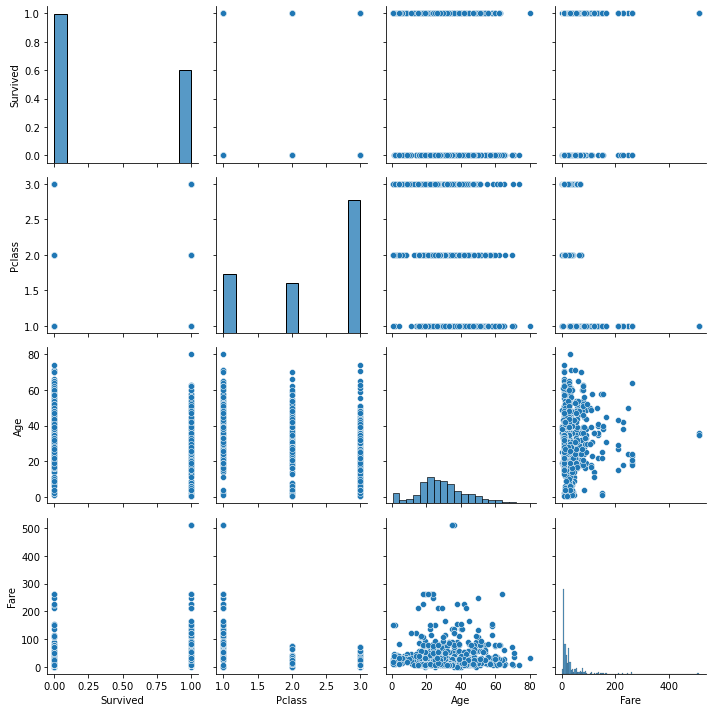

In [44]:

import seaborn as sns
import matplotlib.pyplot as plt
col=['Survived','Pclass','Sex','Age','Fare']
sns.pairplot(df[col],height=2.5)
plt.tight_layout()
plt.show()

In [45]:
inputs = df.drop('Survived',axis='columns')
target = df['Survived']

In [46]:
from sklearn.preprocessing import LabelEncoder
le_Pclass = LabelEncoder()
le_Sex = LabelEncoder()
le_Age = LabelEncoder()
le_Fare = LabelEncoder()

In [47]:
inputs['pclass_n'] = le_Pclass.fit_transform(inputs['Pclass'])
inputs['sex_n'] = le_Sex.fit_transform(inputs['Sex'])
inputs['age_n'] = le_Age.fit_transform(inputs['Age'])
inputs['fare_n'] = le_Fare.fit_transform(inputs['Fare'])

In [48]:
inputs.head()

,Pclass,Sex,Age,Fare,pclass_n,sex_n,age_n,fare_n
0,3,male,22.0,7.2500,2,1,28,18
1,1,female,38.0,71.2833,0,0,51,207
2,3,female,26.0,7.9250,2,0,34,41
3,1,female,35.0,53.1000,0,0,47,189
4,3,male,35.0,8.0500,2,1,47,43


In [49]:
inputs_n=inputs.drop(['Pclass','Sex','Age','Fare'],axis='columns')
inputs_n.shape

(891, 4)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=1)

In [51]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [52]:
X_train.shape

(712, 4)

In [53]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
model.score(X_train,y_train)

0.9845505617977528

In [55]:
model.score(X_test, y_test)

0.7430167597765364

In [56]:
X_test.tail()

,pclass_n,sex_n,age_n,fare_n
796,0,0,64,137
815,0,1,88,0
629,2,1,88,27
421,2,1,27,27
448,2,0,9,116


In [36]:
y_test.tail()

796    1
815    0
629    0
421    0
448    1
Name: Survived, dtype: int64

In [57]:
model.predict([[0,0,64,137]])

array([1], dtype=int64)

In [58]:
model.predict([[2,1,27,27]])

array([0], dtype=int64)